# Import Neccessary Libraries

In [11]:
import os
import random
import numpy  as np


# visualization libraries
import matplotlib.pyplot as plt

import torch
import torch.utils.data as data

import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [12]:
batch_size = 32
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(30),
    transforms.GaussianBlur(3),
    transforms.ToTensor(),
    
    # Standardize each channel of the image
    transforms.Normalize([0.4567, 0.4567, 0.4567],
                                     [0.2425, 0.2425, 0.2425])
    ])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.4567, 0.4567, 0.4567],
                                     [0.2425, 0.2425, 0.2425])
   ])

# Load the datatsets from each folder

In [13]:
data_dir = r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\MSC Project\datasets\fer"

train = datasets.ImageFolder(
    os.path.join(data_dir, 'fer_train_val_test', 'train'),
    transform=transform_train)

In [14]:
val, test = [datasets.ImageFolder(
    os.path.join(data_dir, 'fer_train_val_test', folder),
    transform=transform_test) for folder in ['val', 'test']]

In [15]:
train_iter = data.DataLoader(train, batch_size, shuffle=True, drop_last=True)

valid_iter = data.DataLoader(val, batch_size, shuffle=False,
                                         drop_last=True)

test_iter = data.DataLoader(test, batch_size, shuffle=False,
                                        drop_last=False)

In [16]:
images, labels = next(iter(train_iter))
image = images[2]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


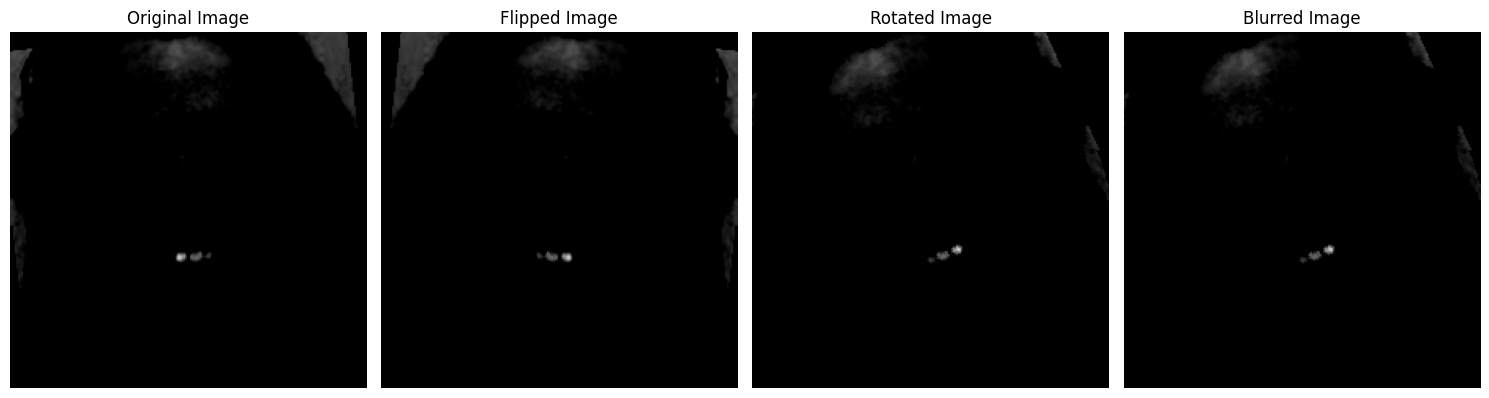

In [17]:
# Apply each transformation step individually and plot the image after each step
plt.figure(figsize=(15, 15))

# Original image
plt.subplot(141)
plt.imshow(image.permute(1, 2, 0).cpu().numpy(), cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Random horizontal flip
flipped_image = transform_train.transforms[0](image)
plt.subplot(142)
plt.imshow(flipped_image.permute(1, 2, 0).cpu().numpy(), cmap='gray')
plt.title('Flipped Image')
plt.axis('off')

# Random rotation
rotated_image = transform_train.transforms[1](flipped_image)
plt.subplot(143)
plt.imshow(rotated_image.permute(1, 2, 0).cpu().numpy(), cmap='gray')
plt.title('Rotated Image')
plt.axis('off')

# Guassain Blur
blurred_image = transform_train.transforms[2](rotated_image)
plt.subplot(144)
plt.imshow(rotated_image.permute(1, 2, 0).cpu().numpy(), cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.tight_layout();
plt.show();


In [21]:
def normalize_image(image):
    image_min = image.min()
    image_max = image.max()
    image.clamp_(min=image_min, max=image_max)
    image.add_(-image_min).div_(image_max - image_min + 1e-5)
    return image


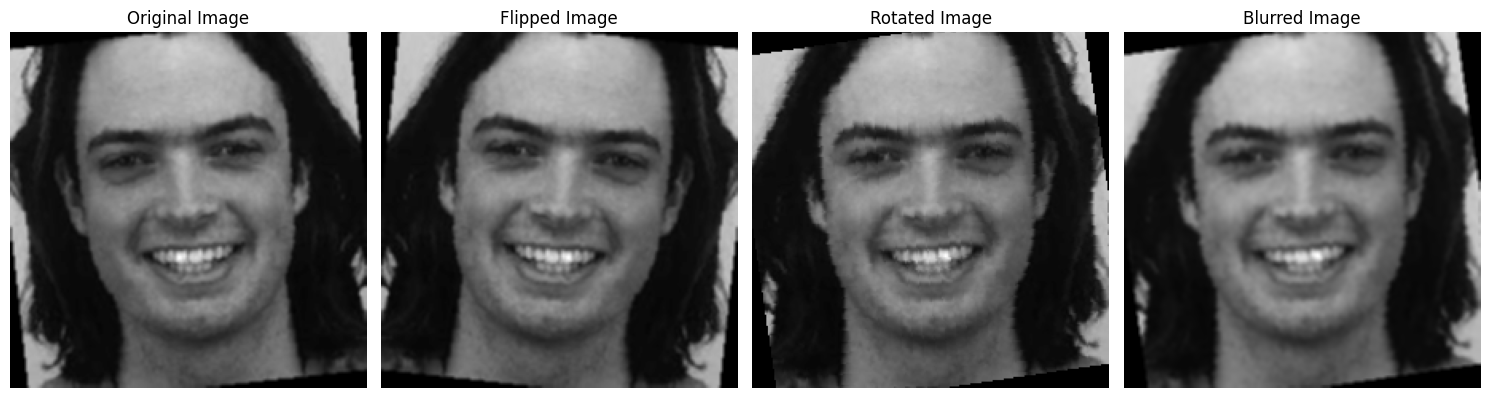

In [25]:
# Create a figure to display images
plt.figure(figsize=(15, 15))

# Original image
plt.subplot(141)
original_image = image.cpu().clone()
original_image = normalize_image(original_image)
plt.imshow(original_image.permute(1, 2, 0).numpy(), cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Random horizontal flip
flipped_image = transform_train.transforms[0](image)
plt.subplot(142)
flipped_image = normalize_image(flipped_image)
plt.imshow(flipped_image.permute(1, 2, 0).numpy(), cmap='gray')
plt.title('Flipped Image')
plt.axis('off')

# Random rotation
rotated_image = transform_train.transforms[1](flipped_image)
plt.subplot(143)
rotated_image = normalize_image(rotated_image)
plt.imshow(rotated_image.permute(1, 2, 0).numpy(), cmap='gray')
plt.title('Rotated Image')
plt.axis('off')

# Gaussian Blur
blurred_image = transform_train.transforms[2](rotated_image)
plt.subplot(144)
blurred_image = normalize_image(blurred_image)
plt.imshow(blurred_image.permute(1, 2, 0).numpy(), cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.tight_layout()
plt.show()
